## Introduction to LangGraph

### Basic OOP Concepts

#### Classes

Imagine you want to create multiple similar things, like different types of cars. A class is like a blueprint or a template for creating these cars. It defines the common characteristics (like color, model, number of wheels) and behaviors (like starting, accelerating, braking) that all cars of that type will have.

In [1]:
class Car:
    # Attributes
    def __init__(self, color, model):
        self.color = color
        self.model = model

    # Methods
    def start(self):
        print(f"The {self.color} {self.model} is starting.")

    def accelerate(self):
        print(f"The {self.color} {self.model} is accelerating.")

Here, Car is the class name. The __ init __ method is a special method called the constructor. It's automatically called when you create a new car object and is used to initialize the object's attributes (color and model in this case). start and accelerate are methods, which are functions associated with the Car class.

#### Objects

An object is a specific instance of a class. Using our car analogy, a red Toyota Camry is an object of the Car class. You create objects from a class, just like you build cars from a blueprint.

In [2]:
my_car = Car("red", "Camry")
another_car = Car("blue", "Mustang")

Now, my_car and another_car are individual Car objects, each with its own specific color and model.

#### Methods

Methods are functions that are defined within a class and operate on the objects of that class. They define the behaviors of the objects.

We saw start and accelerate in our Car class. You call a method on an object using dot notation:

In [3]:
my_car.start()

The red Camry is starting.


In [4]:
another_car.accelerate() 

The blue Mustang is accelerating.


When you call a method on an object, the object itself is automatically passed as the first argument (conventionally named self within the method definition), allowing the method to access and modify the object's attributes.

#### Inheritance

Inheritance is a powerful concept that allows you to create new classes based on existing ones. The new class (called the subclass or derived class) inherits the attributes and methods of the parent class (or base class). This promotes code reusability and helps create a hierarchy of related classes.

Let's say we want to create a SportsCar class that has all the properties of a regular Car but also has a turbo attribute and a boost method:

In [5]:
class SportsCar(Car):  # SportsCar inherits from Car
    def __init__(self, color, model, turbo):
        super().__init__(color, model)  # Call the parent class's constructor
        self.turbo = turbo

    def boost(self):
        if self.turbo:
            print("Initiating turbo boost!")
        else:
            print("No turbo available.")

Here, SportsCar inherits from Car. The super().__init__(color, model) line calls the constructor of the Car class to initialize the color and model attributes. The SportsCar class then adds its own specific attribute (turbo) and method (boost).

Now you can create SportsCar objects that have all the characteristics of a Car plus the added features:

In [6]:
my_sports_car = SportsCar("yellow", "Supra", True)

In [7]:
my_sports_car.start()   # Inherited from Car


The yellow Supra is starting.


In [8]:
my_sports_car.boost()   # Specific to SportsCar

Initiating turbo boost!


In a nutshell:

- Class: A blueprint for creating objects.
- Object: A specific instance of a class.
- Method: A function associated with an object that defines its behavior.
- Inheritance: A mechanism for creating new classes based on existing ones, inheriting their attributes and methods.

### Pydantic - For Data Validation

Imagine you're building a web application that takes user information like name, email, and age. You need to make sure that the "age" field actually contains a number, the "email" looks like a valid email address, and the "name" isn't empty. This process of checking if data meets certain criteria is called data validation.

Pydantic is a powerful Python library that simplifies data validation by allowing you to define data structures as Python classes with type hints. Pydantic then automatically validates the data against these type hints at runtime and provides helpful error messages if the data doesn't conform.

#### Models

At the heart of Pydantic are models. A Pydantic model is a Python class that inherits from `pydantic.BaseModel`. You define the expected structure and data types of your data by adding type-hinted attributes to this class.

In [9]:
from pydantic import BaseModel

class User(BaseModel):
    name: str
    email: str
    age: int
    is_active: bool = False  # Default value

In this example, the User model expects data with a name (string), an email (string), an age (integer), and an optional is_active (boolean, defaulting to False).

#### Validation

When you create an instance of a Pydantic model with some data, Pydantic automatically validates that data against the type hints defined in the model.

In [10]:
user_data_valid = {"name": "Alice", "email": "alice@example.com", "age": 30}
user_valid = User(**user_data_valid)
print(user_valid)
print(user_valid.age)


name='Alice' email='alice@example.com' age=30 is_active=False
30


In [11]:

user_data_invalid = {"name": "Bob", "email": "bob@", "age": "twenty"}
try:
    user_invalid = User(**user_data_invalid)
except Exception as e:
    print(e)

1 validation error for User
age
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='twenty', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/int_parsing


If the data is valid, Pydantic creates an instance of your model, and you can access the validated data as attributes of that object. If the data is invalid, Pydantic raises a `ValidationError` containing detailed information about the validation errors.

#### Type Hints

Pydantic heavily relies on Python's type hints. These hints not only make your code more readable but also tell Pydantic what kind of data to expect for each field. Pydantic supports a wide range of built-in types (like str, int, float, bool, list, dict) and also allows for more complex types using the typing module (like Optional, Union, List, Dict).

#### Data Conversion

Pydantic doesn't just validate; it also tries to intelligently parse and convert the input data to the expected types. For example, if you provide "42" as the age, Pydantic will convert it to the integer 42 if the age field is type-hinted as int.

#### Serialization

Pydantic models can also easily be serialized back into dictionaries or JSON format, making them convenient for working with APIs and data storage.

In [12]:
print(user_valid.model_dump())


{'name': 'Alice', 'email': 'alice@example.com', 'age': 30, 'is_active': False}


In [13]:
import json
print(user_valid.model_dump_json())

{"name":"Alice","email":"alice@example.com","age":30,"is_active":false}


### LangGraph

LangGraph is a low-level orchestration framework for building controllable agents. While langchain provides integrations and composable components to streamline LLM application development, the LangGraph library enables agent orchestration — offering customizable architectures, long-term memory, and human-in-the-loop to reliably handle complex tasks

#### LangChain versus LangGraph


LangChain is a broad and versatile framework focused on creating multi-step language processing workflows. LangChain's core concept for complex workflows, including agents, often revolves around linear chains or more intricate, but still somewhat predefined, sequences of steps. While it allows for tool usage and decision-making within agents, the orchestration of multiple agents or complex conditional logic can become less intuitive and harder to manage as complexity grows. LangChain's memory management within agents is often tied to the context window of the LLM or simpler memory objects. Managing state across multiple interacting agents or long, complex workflows can be challenging.

LangGraph is explicitly designed for building stateful, multi-actor applications, particularly excelling in agent orchestration. It introduces a graph-based structure to model complex workflows. LangGraph's graph structure provides a clear and explicit way to define how different agents interact and when control is passed between them. This makes it easier to reason about and manage complex multi-agent scenarios compared to LangChain's more implicit agent execution flow. LangGraph's graph edges can be conditional, enabling the creation of sophisticated workflows with branching logic. You can define different paths the workflow can take based on the output of an agent or the current state. The central state in LangGraph allows for seamless sharing and modification of information between agents. This is crucial for collaborative tasks where agents need to build upon each other's outputs and maintain a shared understanding.

In summary, while LangChain is a powerful general-purpose framework for LLM applications, LangGraph is specifically engineered for the complexities of agent orchestration. Its graph-based architecture and state management capabilities provide a more robust, flexible, and controllable way to build sophisticated multi-agent systems compared to LangChain's more sequential or less state-centric approach to agents. As agent-based applications become more intricate, LangGraph offers a more suitable foundation for managing their complexity.

#### LangGraph Architecture

##### StateGraph

The central piece of LangGraph is the `StateGraph`. It's a class that allows you to define and manage the flow of your application as a directed graph.

##### Nodes

These are the fundamental building blocks of the graph. Each node represents a distinct step in your workflow. A node can be:

- An Agent: An autonomous entity that uses tools and LLMs to make decisions and take actions
- An LLM call: Directly invoking a LLM model
- A Tool invocation: Executing an external tool or function
- Any Python Callable: A regular Python function that processes the state

##### Edges

These define the transitions between nodes. They dictate how the workflow moves from one step to the next. Edges can be:
- UnconditionaL:  A simple directed edge that always leads from one node to another.
- Conditional:  An edge that specifies a function to evaluate the current state. Based on the output of this function, the workflow will transition to one of several possible next nodes. This enables branching logic.

##### State

LangGraph introduces a dedicated State object that acts as a central repository for all information shared across the nodes in the graph. You define the schema of this state using a Pydantic model. This ensures type safety and allows LangGraph to manage the data consistently. As the workflow progresses through the graph, each node can update the state based on its computations. The updated state is then passed to the next node(s) according to the defined edges. While not a core part of the immediate architecture, the state can be designed to be persistent, allowing you to resume workflows or track their history.

##### Compilation

After defining the StateGraph with its nodes and edges, you call the compile() method to create a RunnableGraph. The RunnableGraph adheres to the LangChain Runnable interface, meaning it can be invoked with an input (which initializes the state) and will execute the graph according to its defined structure. The RunnableGraph manages the execution of the nodes in the correct order, passing the state between them based on the edges.

#### Build a Basic Chatbot

In [26]:
# !pip install -r requirements.txt

In [14]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [15]:
## Langsmith Tracking
os.environ["LANGSMITH_TRACING"]=os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_ENDPOINT"]=os.getenv("LANGSMITH_ENDPOINT")
os.environ["LANGSMITH_API_KEY"]=os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_PROJECT"]=os.getenv("LANGSMITH_PROJECT")

groq_api_key = os.getenv("GROQ_API_KEY")
os.environ["USER_AGENT"] = "MyLangChainApp/1.0"

In [16]:
from langchain_groq import ChatGroq

## LLM Model Setup
llm=ChatGroq(model="Gemma2-9b-It",groq_api_key=groq_api_key) 

In [20]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**. 🗼  \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 16, 'total_tokens': 30, 'completion_time': 0.025454545, 'prompt_time': 0.001899456, 'queue_time': 0.015763593, 'total_time': 0.027354001}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-9fffa8a1-2f95-430b-b9ac-367dbe4015ca-0', usage_metadata={'input_tokens': 16, 'output_tokens': 14, 'total_tokens': 30})

The below code establishes a basic LangGraph workflow for a simple chatbot. It defines a State dictionary to hold the conversation history as a list of messages, utilizing Annotated with add_messages for automatic message appending. The workflow consists of a single node, "chatbot," which takes the current state, invokes an LLM with the message history to get a response, and returns the response to be added to the state. The graph is then built with the "chatbot" node connected from the START and leading to the END, and finally compiled into a runnable object, ready to process conversational turns.

In [25]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


You can visualize the graph using the get_graph method and one of the "draw" methods, like draw_ascii or draw_png. The draw methods each require additional dependencies.

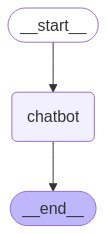

In [27]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

#### Test run the chatbot

Now let's run the chatbot! You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [28]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")
        break

    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: LangGraph is a powerful open-source tool developed by the Hugging Face team. It's designed to help researchers and developers understand and analyze the structure of language. 

Here's what I know about LangGraph:

**Key Features:**

* **Graph Representation of Language:** LangGraph represents words and their relationships as a graph, where nodes are words and edges represent semantic connections. This allows for a visual and intuitive understanding of how words relate to each other.

* **Pre-trained Embeddings:** It leverages pre-trained language embeddings (like Word2Vec, GloVe, or SentenceTransformers) to capture semantic similarities between words.

* **Visualization:** LangGraph provides tools for visualizing the graph, allowing you to explore word relationships, clusters, and patterns in a visually appealing way.

* **Analysis:** It offers various analysis tools to study the structure of the graph, such as calculating centrality measures, identifying communities, and e

Congratulations! You've built your first chatbot using LangGraph. This bot can engage in basic conversation by taking user input and generating responses using an LLM. You can inspect a LangSmith Trace for the call above at the provided link.
However, you may have noticed that the bot's knowledge is limited to what's in its training data. In the next blog, we'll add a web search tool to expand the bot's knowledge and make it more capable.